# Лабораторна робота № 5
## Виконала Денисенко Анастасія, ФІ-21

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

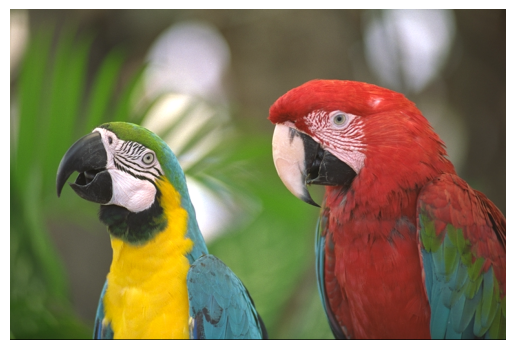

In [2]:
# Load image
img = cv2.imread('kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.axis('off')
plt.imshow(img)
plt.show()

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

### Quantize the original image

In [4]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
        index = np.argmin(distances)
        new_pixel = colors[index]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
        
quantized = quantized.astype(int)

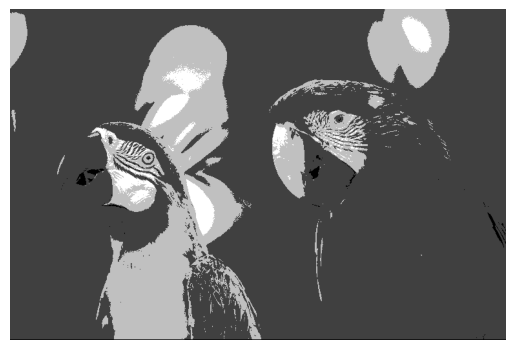

In [5]:
plt.axis('off')
plt.imshow(quantized)
plt.show()

In [6]:
# Compute average quantization error
avg_quant_error = np.mean(np.abs(img.astype(float) - quantized.astype(float)))

In [7]:
avg_quant_error

32.75775570339627

### Floyd-Steinberg Dithering

In [8]:
rows, cols = img.shape[:2]
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = img.astype(np.float32).copy()
dithering = np.zeros_like(img, dtype=np.uint8)

colors_f = colors.astype(np.float32)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :] 

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors_f - pixel) ** 2, axis=1))
        index = np.argmin(distances)
        new_pixel = colors_f[index]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c + 1, :] += quant_error * (7.0 / 16.0)

        img_tmp[r + 1, c - 1, :] += quant_error * (3.0 / 16.0)

        img_tmp[r + 1, c, :] += quant_error * (5.0 / 16.0)

        img_tmp[r + 1, c + 1, :] += quant_error * (1.0 / 16.0)
        
        for rr, cc in [(r, c+1), (r+1, c-1), (r+1, c), (r+1, c+1)]:
            img_tmp[rr, cc, :] = np.clip(img_tmp[rr, cc, :], 0.0, 255.0)

        # Apply dithering
        dithering[r, c, :] = np.clip(new_pixel, 0, 255).astype(np.uint8)

img_tmp = np.clip(img_tmp, 0.0, 255.0)

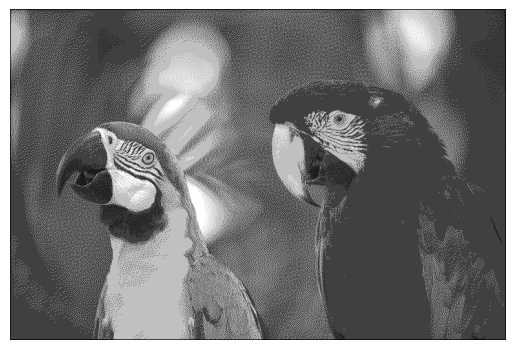

In [9]:
plt.axis('off')
plt.imshow(dithering)
plt.show()

In [10]:
avg_dith_error = np.mean(np.abs(img.astype(float) - dithering.astype(float)))

In [11]:
avg_dith_error

40.34530385335287